<h1 style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;
           font-weight: bold;">
House Value Prediction Analysis
</h1>



<p style="background: linear-gradient(to right, #FF5733, #FFC300);
          -webkit-background-clip: text;
          color: transparent;">
In this notebook, we aim to predict the <strong>median house value</strong> using the California Housing dataset.  
We will perform the following steps to analyze and model the data:
</p>

<ul style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;">
    <li>Exploratory Data Analysis (EDA)</li>
    <li>Feature preprocessing (scaling & encoding)</li>
    <li>Building and evaluating two regression models: Linear Regression and Gradient Boosting Regressor</li>
    <li>Comparing model performance using metrics like MAE, RMSE, and R²</li>
</ul>

<p style="background: linear-gradient(to right, #FF5733, #FFC300);
          -webkit-background-clip: text;
          color: transparent;">
The target variable in this dataset is <strong><code>median_house_value</code></strong>.  
We will explore the features, prepare the data, train models, and evaluate which model performs best in predicting house prices.
</p>


______________

<h2 style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;">
Data Overview
</h2>


In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [68]:
import warnings
warnings.filterwarnings(action="ignore")

In [69]:
df = pd.read_csv("housing - housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


<h2 style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;">
Data Preprocessing
</h2>


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [71]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [72]:
df.duplicated().sum()

0

In [73]:
df.isnull().sum().sum()

207

<Axes: >

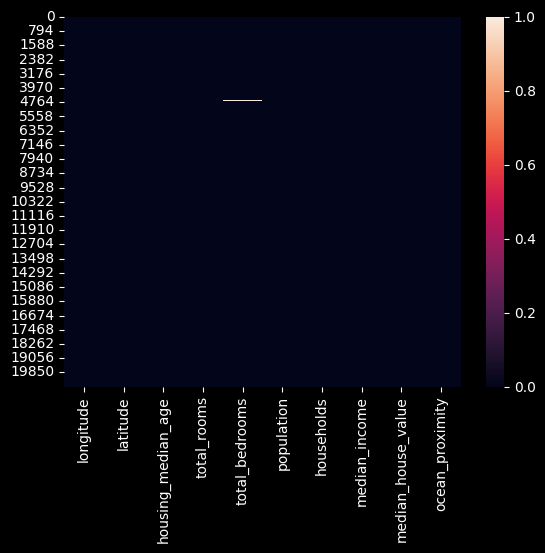

In [74]:
sns.heatmap(df.isnull())

In [75]:
missing_table = df.isnull().mean().mul(100).loc[lambda x: x > 0].sort_values()
missing_table

total_bedrooms    1.002907
dtype: float64

In [76]:
missing_table = pd.DataFrame({
    "Missing Values": df.isnull().sum(),
    "Percentage ": df.isnull().mean().mul(100)
}).loc[lambda x: x["Missing Values"] > 0].sort_values("Percentage ")
missing_table

,Missing Values,Percentage
total_bedrooms,207,1.002907


In [77]:
colors = ["#0D47A1", "#1565C0", "#1976D2", "#1E88E5", "#2196F3", "#42A5F5", "#64B5F6", "#90CAF9", "#BBDEFB"]

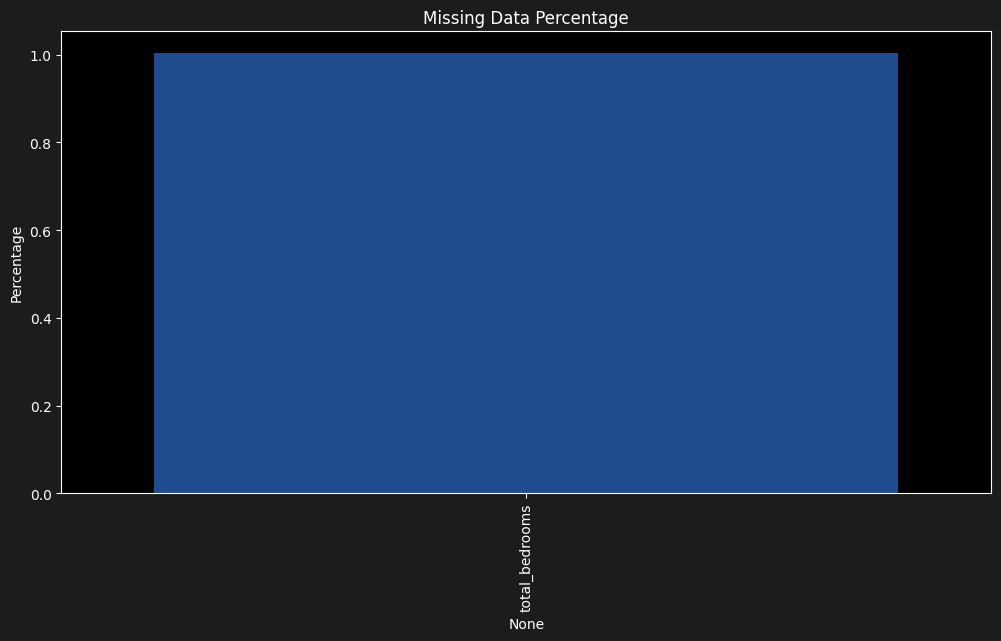

In [78]:
plt.style.use("dark_background")
plt.figure(figsize=(12,6), facecolor="#1C1C1C")
sns.barplot(x=missing_table.index[::-1], y=missing_table["Percentage "][::-1], palette=colors)
plt.xticks(rotation=90, color="white"); plt.yticks(color="white")
plt.title("Missing Data Percentage", color="white"); plt.ylabel("Percentage", color="white")
plt.show()

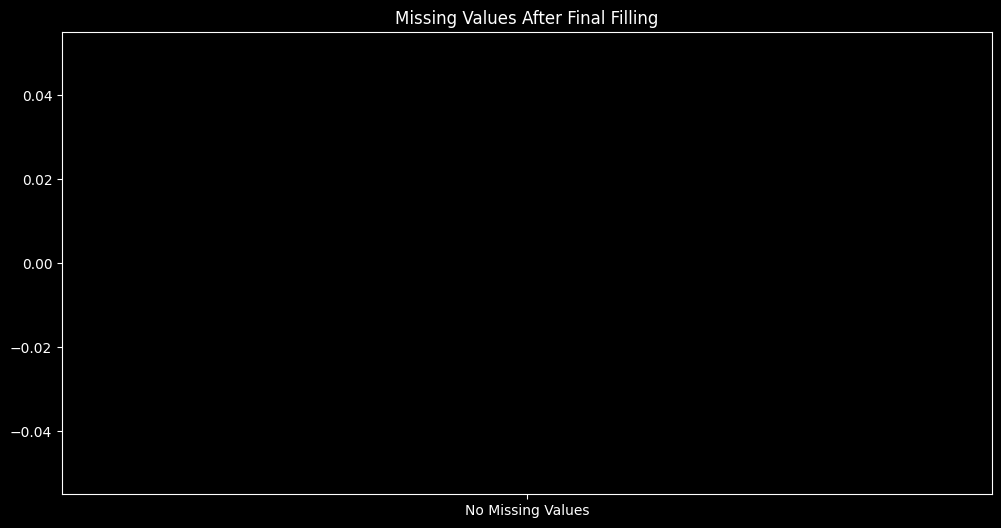

In [79]:
df.fillna(df.mode().iloc[0], inplace=True)   # Fill missing values in categorical columns with the most frequent value (mode)

# Cheak the missing values
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(12,6))     # Graphic 
if missing_percent.empty:
    sns.barplot(x=["No Missing Values"], y=[0], palette="viridis")
else:
    sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="viridis")

plt.xticks(rotation=0)
plt.title("Missing Values After Final Filling")
plt.show()

In [80]:
df.isnull().sum().sum() 

0

__________________

<h2 style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;">
Exploratory Data Analysis (EDA)
</h2>


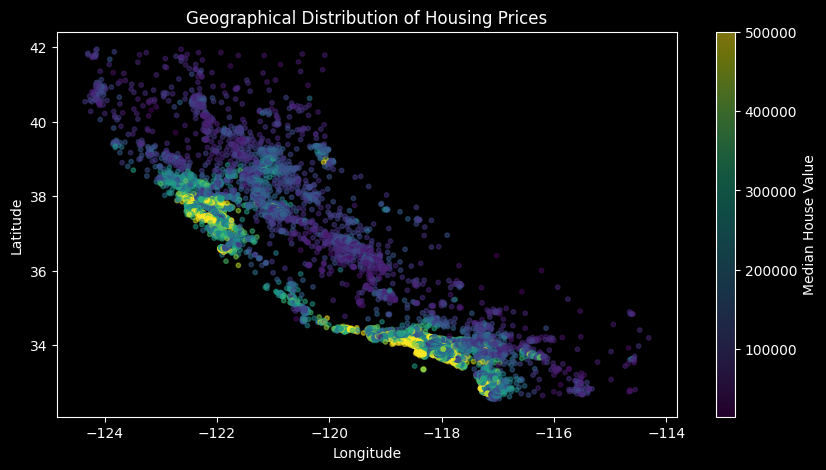

In [90]:
plt.figure(figsize=(10,5))
plt.scatter(df['longitude'], df['latitude'], 
            c=df['median_house_value'], cmap='viridis', s=10, alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Housing Prices')
plt.show()


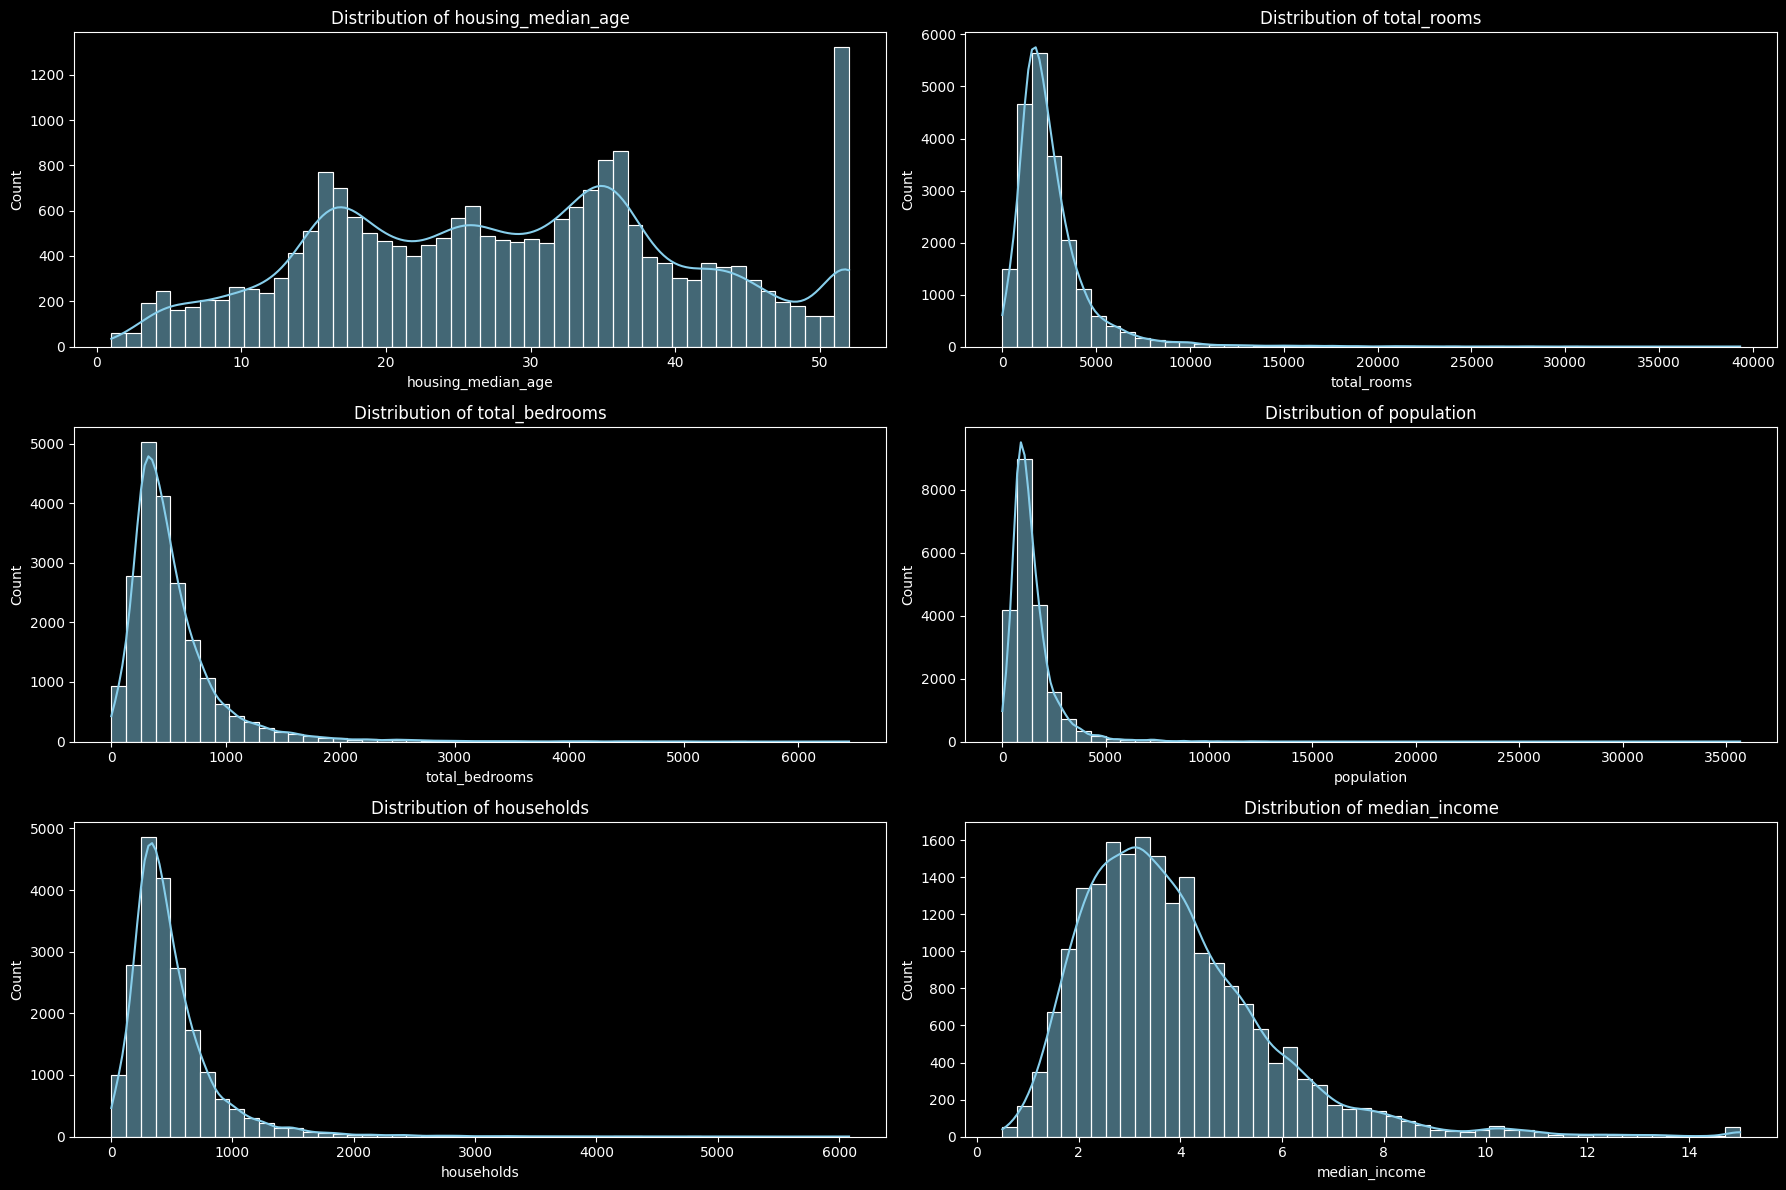

In [91]:
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
            'households', 'median_income']

plt.figure(figsize=(18,12))
for i, col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


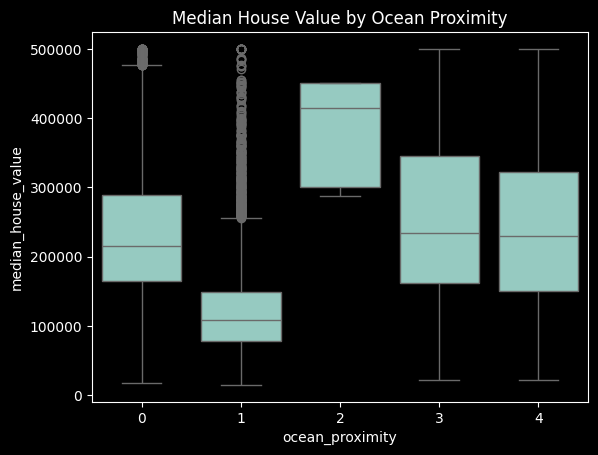

In [93]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Median House Value by Ocean Proximity')
plt.show()


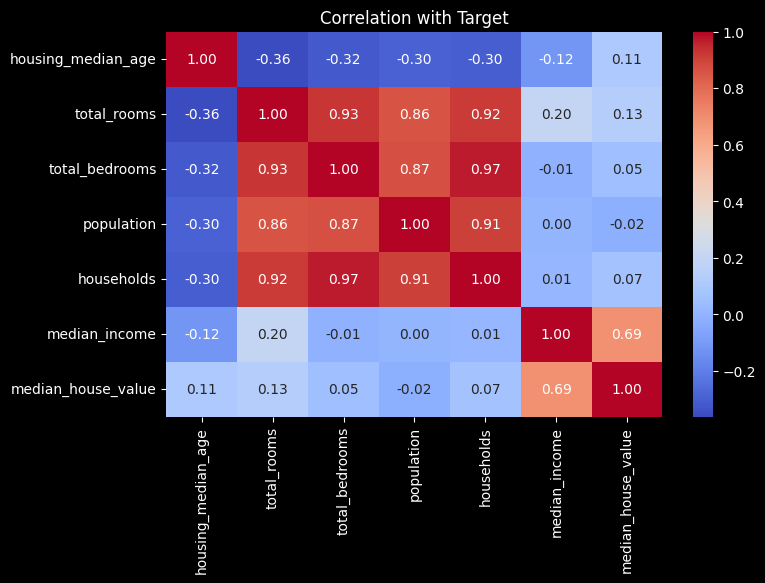

In [98]:
corr = df[num_cols + ['median_house_value']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Target')
plt.show()


___________________

<h2 style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;">
Model 1: Linear Regression
</h2>


In [102]:
# Features (all columns except the target)
X = df.drop("median_house_value", axis=1)  # Features

# Target (what we want to predict)
y = df["median_house_value"]  # Target

# Check features
X.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
cat_cols = ["ocean_proximity"]
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove("latitude")  # optional, can include latitude/longitude if needed
num_cols.remove("longitude")

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])


In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Pipeline: preprocessing + linear regression
lin_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit the model
lin_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', LinearRegression())])

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred_lin = lin_pipeline.predict(X_test)

# Evaluation
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print(f"MAE: {mae_lin:.2f}")
print(f"MSE: {mse_lin:.2f}")
print(f"RMSE: {rmse_lin:.2f}")
print(f"R2 Score: {r2_lin:.2f}")


Linear Regression Performance:
MAE: 51237.89
MSE: 5046173974.76
RMSE: 71036.43
R2 Score: 0.61


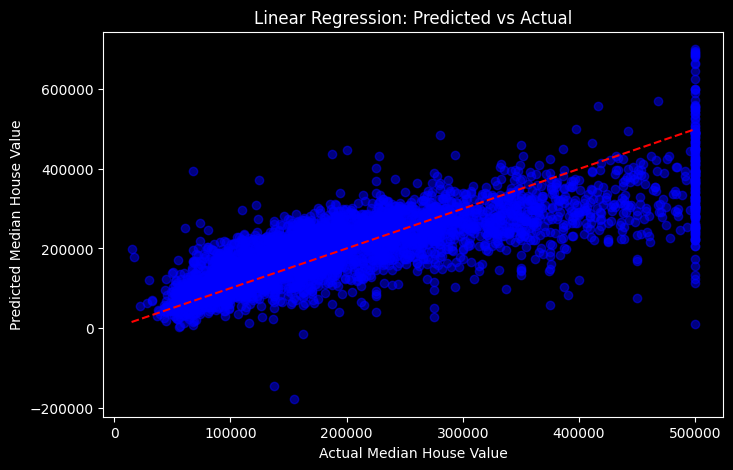

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()


________

<h2 style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;">
Model 2: Gradient Boosting Regressor
</h2>


In [110]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Pipeline: preprocessing + gradient boosting
gbr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=200, 
        learning_rate=0.1, 
        max_depth=3, 
        random_state=42
    ))
])


In [114]:
# Fit the Gradient Boosting model
gbr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor',
                 GradientBoostingRegressor(n_estimators=200, random_state=42))])

In [115]:
# Predictions
y_pred_gbr = gbr_pipeline.predict(X_test)


In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Performance:")
print(f"MAE: {mae_gbr:.2f}")
print(f"MSE: {mse_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R2 Score: {r2_gbr:.2f}")


Gradient Boosting Performance:
MAE: 44469.99
MSE: 3987896334.77
RMSE: 63149.79
R2 Score: 0.70


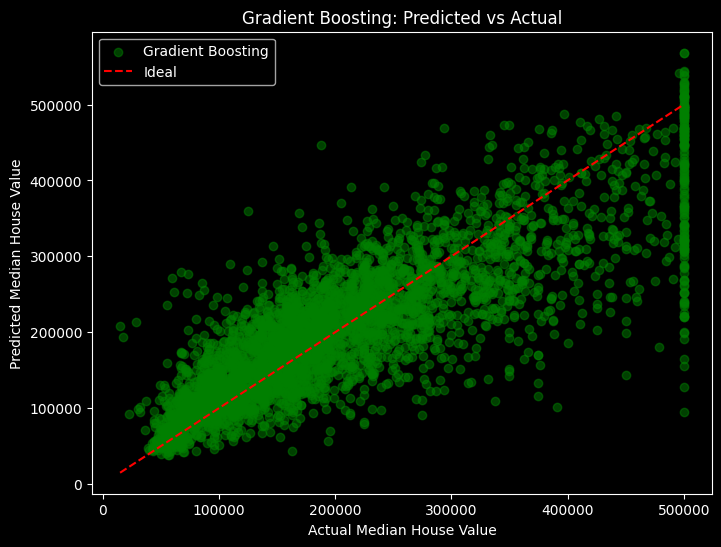

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Gradient Boosting predictions
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='green', label='Gradient Boosting')

# الخط الأحمر يمثل التوقع المثالي
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Gradient Boosting: Predicted vs Actual")
plt.legend()
plt.show()


____________________


<h2 style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;">
Model Comparison
</h2>


In [122]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Gradient Boosting"],
    "MAE": [mae_lin, mae_gbr],
    "MSE": [mse_lin, mse_gbr],
    "RMSE": [rmse_lin, rmse_gbr],
    "R2 Score": [r2_lin, r2_gbr]
})

# تحديد الأفضل تلقائيًا
best_model = comparison.loc[comparison['R2 Score'].idxmax(), 'Model']
print(comparison)
print(f"\nThe best model overall based on R2 Score is: {best_model}✨✨")


               Model           MAE           MSE          RMSE  R2 Score
0  Linear Regression  51237.890019  5.046174e+09  71036.427097  0.614916
1  Gradient Boosting  44469.994027  3.987896e+09  63149.792832  0.695675

The best model overall based on R2 Score is: Gradient Boosting✨✨


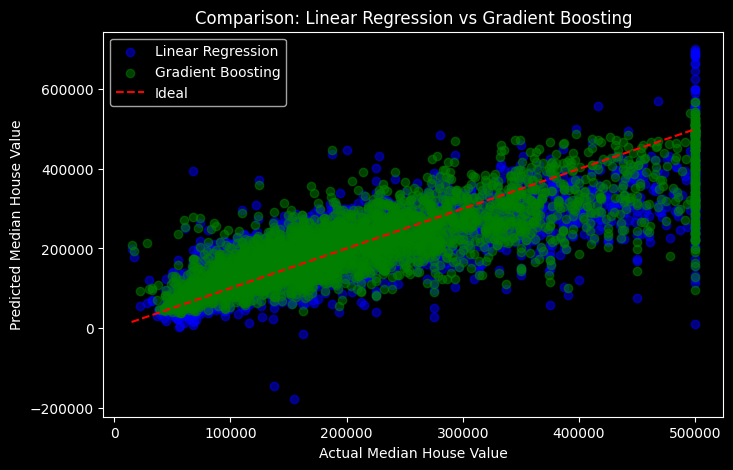

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Linear Regression
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue', label='Linear Regression')

# Gradient Boosting
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='green', label='Gradient Boosting')

# الخط الأحمر يمثل y = x (التوقع المثالي)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Comparison: Linear Regression vs Gradient Boosting")
plt.legend()
plt.show()


_____________

<h2 style="background: linear-gradient(to right, #FF5733, #FFC300);
           -webkit-background-clip: text;
           color: transparent;">
Conclusion & Next Steps
</h2>

<p style="background: linear-gradient(to right, #FF5733, #FFC300);
          -webkit-background-clip: text;
          color: transparent;">
In this notebook, we successfully explored the California Housing dataset, prepared the data, and built two powerful regression models: <strong>Linear Regression</strong> and <strong>Gradient Boosting Regressor</strong>.
</p>

<p style="background: linear-gradient(to right, #FF5733, #FFC300);
          -webkit-background-clip: text;
          color: transparent;">
Through careful evaluation using MAE, RMSE, and R² metrics, we identified the model that best predicts <strong>median house values</strong>.  
This demonstrates how combining data analysis, feature engineering, and advanced machine learning techniques can lead to meaningful predictions and insights.
</p>

<p style="background: linear-gradient(to right, #FF5733, #FFC300);
          -webkit-background-clip: text;
          color: transparent;">
💡 <strong>Takeaway:</strong> Data is powerful. With the right approach, you can turn raw information into actionable knowledge. Keep experimenting, refining your models, and pushing the boundaries of what you can predict!
</p>

<p style="background: linear-gradient(to right, #FF5733, #FFC300);
          -webkit-background-clip: text;
          color: transparent;">
🚀 The journey doesn't end here. Use these insights as a stepping stone to explore more datasets, implement more advanced models, and continue growing as a data scientist!
</p>
